In [ ]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf


#티스토리 업로드시 최적화 코드
#from IPython.core.display import display, HTML
#display(HTML("<style>.container {width:90% !important;}</style>"))

# 2023.04.17
# EDA
Dataset Info.

train.csv [파일]

    ID : 샘플 고유 ID
    User-ID : 유저 고유 ID
    Book-ID : 도서 고유 ID
    유저 정보
    Age : 나이
    Location : 지역
    도서 정보
    Book-Title : 도서 명
    Book-Author : 도서 저자
    Year-Of-Publication : 도서 출판 년도 (-1일 경우 결측 혹은 알 수 없음)
    Publisher : 출판사
    Book-Rating : 유저가 도서에 부여한 평점 (0점 ~ 10점)


test.csv [파일]

    ID : 샘플 고유 ID
    User-ID : 유저 고유 ID
    Book-ID : 도서 고유 ID
    유저 정보
    Age : 나이
    Location : 지역
    도서 정보
    Book-Title : 도서 명
    Book-Author : 도서 저자
    Year-Of-Publication : 도서 출판 년도 (-1일 경우 결측 혹은 알 수 없음)
    Publisher : 출판사


sample_submission.csv [제출양식]

    ID : 샘플 고유 ID
    Book-Rating : 예측한 유저가 도서에 부여할 평점

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_dir = '/content/drive/MyDrive/데이콘/데이콘 도서 추천 알고리즘'

In [ ]:
import numpy as np
import random
import os
import gc

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

In [ ]:
def csv_to_parquet(csv_path, save_name):
    df = pd.read_csv(csv_path)
    df.to_parquet(f'./{save_name}.parquet')
    del df
    gc.collect()
    print(save_name, 'Done.')

In [ ]:
csv_to_parquet(file_dir + '/train.csv', 'train')
csv_to_parquet(file_dir + '/test.csv', 'test')

train Done.
test Done.


In [ ]:
train = pd.read_parquet('/content/train.parquet')
test = pd.read_parquet('/content/test.parquet')
sample_submission = pd.read_csv(file_dir+'/sample_submission.csv', index_col = 0)

In [ ]:
train.head(10)

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books
3,TRAIN_000003,USER_00000,BOOK_098622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon
4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book
5,TRAIN_000005,USER_00000,BOOK_206799,5,23.0,"sackville, new brunswick, canada",Neuromancer (Remembering Tomorrow),William Gibson,1995.0,Ace Books
6,TRAIN_000006,USER_00000,BOOK_239414,9,23.0,"sackville, new brunswick, canada",The Little Prince,Antoine de Saint-ExupÃ©ry,1982.0,Harvest Books
7,TRAIN_000007,USER_00000,BOOK_269070,0,23.0,"sackville, new brunswick, canada",Forests of the Heart (Newford),Charles de Lint,2001.0,Tor Books
8,TRAIN_000008,USER_00001,BOOK_190739,7,35.0,"wake forest, north carolina, usa",Self Matters : Creating Your Life from the Ins...,Phillip C. McGraw,2001.0,Free Press
9,TRAIN_000009,USER_00001,BOOK_210079,0,35.0,"wake forest, north carolina, usa",The Self Matters Companion : Helping You Creat...,Phillip C. McGraw,2002.0,Free Press


In [ ]:
train[['User-ID','Location']].drop_duplicates().groupby(['User-ID'])['Location'].count().sort_values()

User-ID
USER_00000    1
USER_61443    1
USER_61442    1
USER_61441    1
USER_61440    1
             ..
USER_30605    1
USER_30604    1
USER_30603    1
USER_30622    1
USER_92100    1
Name: Location, Length: 83256, dtype: int64

User-ID를 기준으로 Location은 고유의 값이라는 것을 확인 할 수 있습니다. 즉, 평가를 해주는 유저의 지역은 고유의 값입니다.

In [ ]:
train['City'] = [(i.split(',')[0]).lstrip().upper() for i in train['Location']]
train['State'] = [(i.split(',')[1]).lstrip().upper() for i in train['Location']]
train['Country'] = [(i.split(',')[-1]).lstrip().upper() for i in train['Location']]

In [ ]:
test['City'] = [(i.split(',')[0]).lstrip().upper() for i in test['Location']]
test['State'] = [(i.split(',')[1]).lstrip().upper() for i in test['Location']]
test['Country'] = [(i.split(',')[-1]).lstrip().upper() for i in test['Location']]

In [ ]:
train['City'].unique()

array(['SACKVILLE', 'WAKE FOREST', 'MINNEAPOLIS', ..., 'HAMPTON COVE',
       'VANCOUVER/ RICHMOND', 'CASTIGLION FIORENTINO'], dtype=object)

In [ ]:
train['State'].unique()

array(['NEW BRUNSWICK', 'NORTH CAROLINA', 'MINNESOTA', ..., 'SHETLAND',
       'WANGANUI', 'VAUCLUSE'], dtype=object)

In [ ]:
train['Country'].unique()

array(['CANADA', 'USA', 'GERMANY', 'SPAIN', 'AUSTRALIA', 'UNITED KINGDOM',
       '', 'ITALY', 'NETHERLANDS', 'PORTUGAL', 'SWEDEN', 'AUSTRIA',
       'FRANCE', 'FINLAND', 'NEW ZEALAND', 'SINGAPORE', 'SWITZERLAND',
       'PHILIPPINES', 'ESPAÑA', 'MALAYSIA', 'BELGIUM', 'JAPAN', 'DENMARK',
       'BELIZE', 'ENGLAND', 'POLAND', 'IRELAND', 'HAITI',
       'TRINIDAD AND TOBAGO', 'DEUTSCHLAND', 'TANZANIA', 'MOLDOVA',
       'BULGARIA', 'LUXEMBOURG', 'SOUTH AFRICA', 'CZECH REPUBLIC',
       'ISRAEL', 'MALTA', 'PETROLWAR NATION', 'KUWAIT', 'PERU', 'ECUADOR',
       'SOUTH KOREA', 'TURKEY', 'NIGERIA', 'BRAZIL', 'HUNGARY',
       'INDONESIA', 'KAZAKHSTAN', 'INDIA', 'CHINA', 'EGYPT', 'CROATIA',
       'TAIWAN', 'ARGENTINA', 'CHILE', 'VENEZUELA', 'GALIZA', 'ICELAND',
       'SCOTLAND', 'BOLIVIA', 'LITHUANIA', 'NORWAY', 'MEXICO', 'BAHAMAS',
       'UNITED SATES', 'ROMANIA', 'IRAN', 'DOMINICAN REPUBLIC',
       'MARICOPA', 'THE WORLD TOMORROW', 'ANDORRA', 'GALIZA NEGHRA',
       'JERSEY', 'GHANA', '

Location을 ','로 나누면 첫 단어가 도시, 두번째가 State(주), 마지막 단어가 나라입니다. 해당 열을 새로 만들어줍니다.

In [ ]:
con_df = pd.DataFrame(train['Country'].value_counts())
con_df = con_df.reset_index()
con_df.columns = ['Country','num_country']
con_df

,Country,num_country
0,USA,630043
1,CANADA,78571
2,UNITED KINGDOM,27050
3,GERMANY,23471
4,,21012
...,...,...
239,PALAU,1
240,GALIZA NEGHRA,1
241,MACEDONIA,1
242,PRINCE WILLIAM,1


In [ ]:
train[train['Country'] == 'RICHMOND COUNTRY']

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher,City,State,Country
58728,TRAIN_058728,USER_06105,BOOK_028694,7,35.0,"staten island, new york, richmond country",The Pigman,PAUL ZINDEL,1983.0,Bantam,STATEN ISLAND,NEW YORK,RICHMOND COUNTRY


지역이 Null이거나 N/A 처럼 표기된 곳도 있고, PRINCE WILLIAM, RICHMOND COUNTRY과 같이 이상한 지역도 있습니다. 엄밀하게는 나라말고 이상한 것들이 끼어있습니다. 해당 자료는 전처리가 필요합니다. City, State를 가지고 최빈값(mode)를 이용하여 Country를 채우는 것도 하나의 방법이라고 생각합니다.

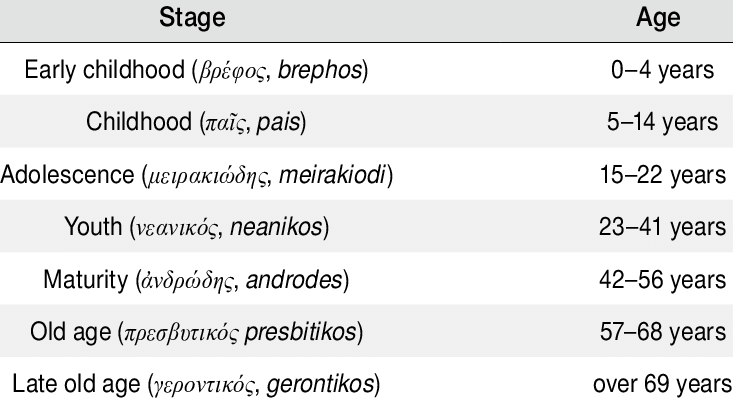

Seven stages of human life according to Ptolemy

In [ ]:
# 나이 그룹화
labels = ['0-4','5-14','15-22','23-41','42-56','57-68','69+']
bins = [0, 4, 14, 22, 41, 56, 68, 250]
train['Age_gb'] = pd.cut(train.Age, bins, labels = labels,include_lowest = True)

In [ ]:
test['Age_gb'] = pd.cut(test.Age, bins, labels = labels,include_lowest = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
qual_col = ['User-ID', 'Book-ID','Book-Title','Book-Author','Publisher', 'Location', 'Age_gb', 'City','State','Country']

train_lb = train.__deepcopy__() 
test_lb = test.__deepcopy__()

for i in qual_col:
    le = LabelEncoder()
    le=le.fit(train_lb[i])
    for label in np.unique(test[i].dropna()):
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    train_lb[i] = le.transform(train_lb[i])
    test_lb[i] = le.transform(test_lb[i])

In [ ]:
X_train = train_lb.drop(columns = ['ID','Book-Rating','Rating_counts'])
y_train = train_lb['Book-Rating']
x_test = test_lb.drop(columns = ['ID'])

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=113)

from catboost import CatBoostRegressor

model = CatBoostRegressor(
                      random_state=113,
                      loss_function='RMSE')

In [ ]:
y_valid_pred = 0*y_train
y_test_pred = 0

for i, (train_index, test_index) in enumerate(skfold.split(X_train, y_train)):    
    X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    print( "\nFold ", i)
    
    fit_model = model.fit(X_train_fold, y_train_fold, 
                          eval_set=(X_valid_fold, y_valid_fold),
                          use_best_model=True
                          )
    print( "  N trees = ", model.tree_count_ )
        
    # Generate validation predictions for this fold
    pred = fit_model.predict(X_valid_fold)
    y_valid_pred.iloc[test_index] = pred
    
    # Accumulate test set predictions
    y_test_pred += fit_model.predict(x_test)
    
y_test_pred /= 5  # Average test set predictions


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
37:	learn: 3.7425337	test: 3.7438465	best: 3.7438465 (37)	total: 3.21s	remaining: 1m 21s
38:	learn: 3.7417750	test: 3.7431973	best: 3.7431973 (38)	total: 3.28s	remaining: 1m 20s
39:	learn: 3.7410297	test: 3.7424562	best: 3.7424562 (39)	total: 3.35s	remaining: 1m 20s
40:	learn: 3.7402173	test: 3.7416114	best: 3.7416114 (40)	total: 3.42s	remaining: 1m 19s
41:	learn: 3.7396430	test: 3.7410636	best: 3.7410636 (41)	total: 3.48s	remaining: 1m 19s
42:	learn: 3.7387658	test: 3.7401962	best: 3.7401962 (42)	total: 3.56s	remaining: 1m 19s
43:	learn: 3.7367752	test: 3.7382293	best: 3.7382293 (43)	total: 3.64s	remaining: 1m 19s
44:	learn: 3.7351261	test: 3.7365335	best: 3.7365335 (44)	total: 3.71s	remaining: 1m 18s
45:	learn: 3.7340337	test: 3.7354954	best: 3.7354954 (45)	total: 3.78s	remaining: 1m 18s
46:	learn: 3.7333829	test: 3.7348853	best: 3.7348853 (46)	total: 3.84s	remaining: 1m 17s
47:	learn: 3.7314937	test: 3.7329905	best: 3.7329905 (47)	total: 3.91s	rem

In [ ]:
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['Book-Rating'] = y_test_pred
sub

,ID,Book-Rating
0,TEST_000000,4.351419
1,TEST_000001,4.089347
2,TEST_000002,4.437624
3,TEST_000003,4.610978
4,TEST_000004,4.725430
...,...,...
159616,TEST_159616,3.885584
159617,TEST_159617,3.609447
159618,TEST_159618,3.766943
159619,TEST_159619,2.820912


In [ ]:
sub.to_csv(os.path.join(file_dir,'submit_cat_2.csv'), index=False,encoding="utf-8-sig")